In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import os

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv(r"C:\Users\haris\Downloads\creditcard.csv")

dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
d = dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
len(dataset)

284807

In [6]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
len(dataset.columns)

31

In [8]:
#check out the duplicates

# duplicated() selects the duplicate rows except first
# occurrence based on all columns
duplicate = dataset[dataset.duplicated()]
 
print("Duplicate Rows :")
duplicate

#We found no duplicate rows

Duplicate Rows :


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [9]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']
      

In [11]:
subset_data = dataset[df]
subset_data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
d

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<Figure size 1500x200 with 0 Axes>

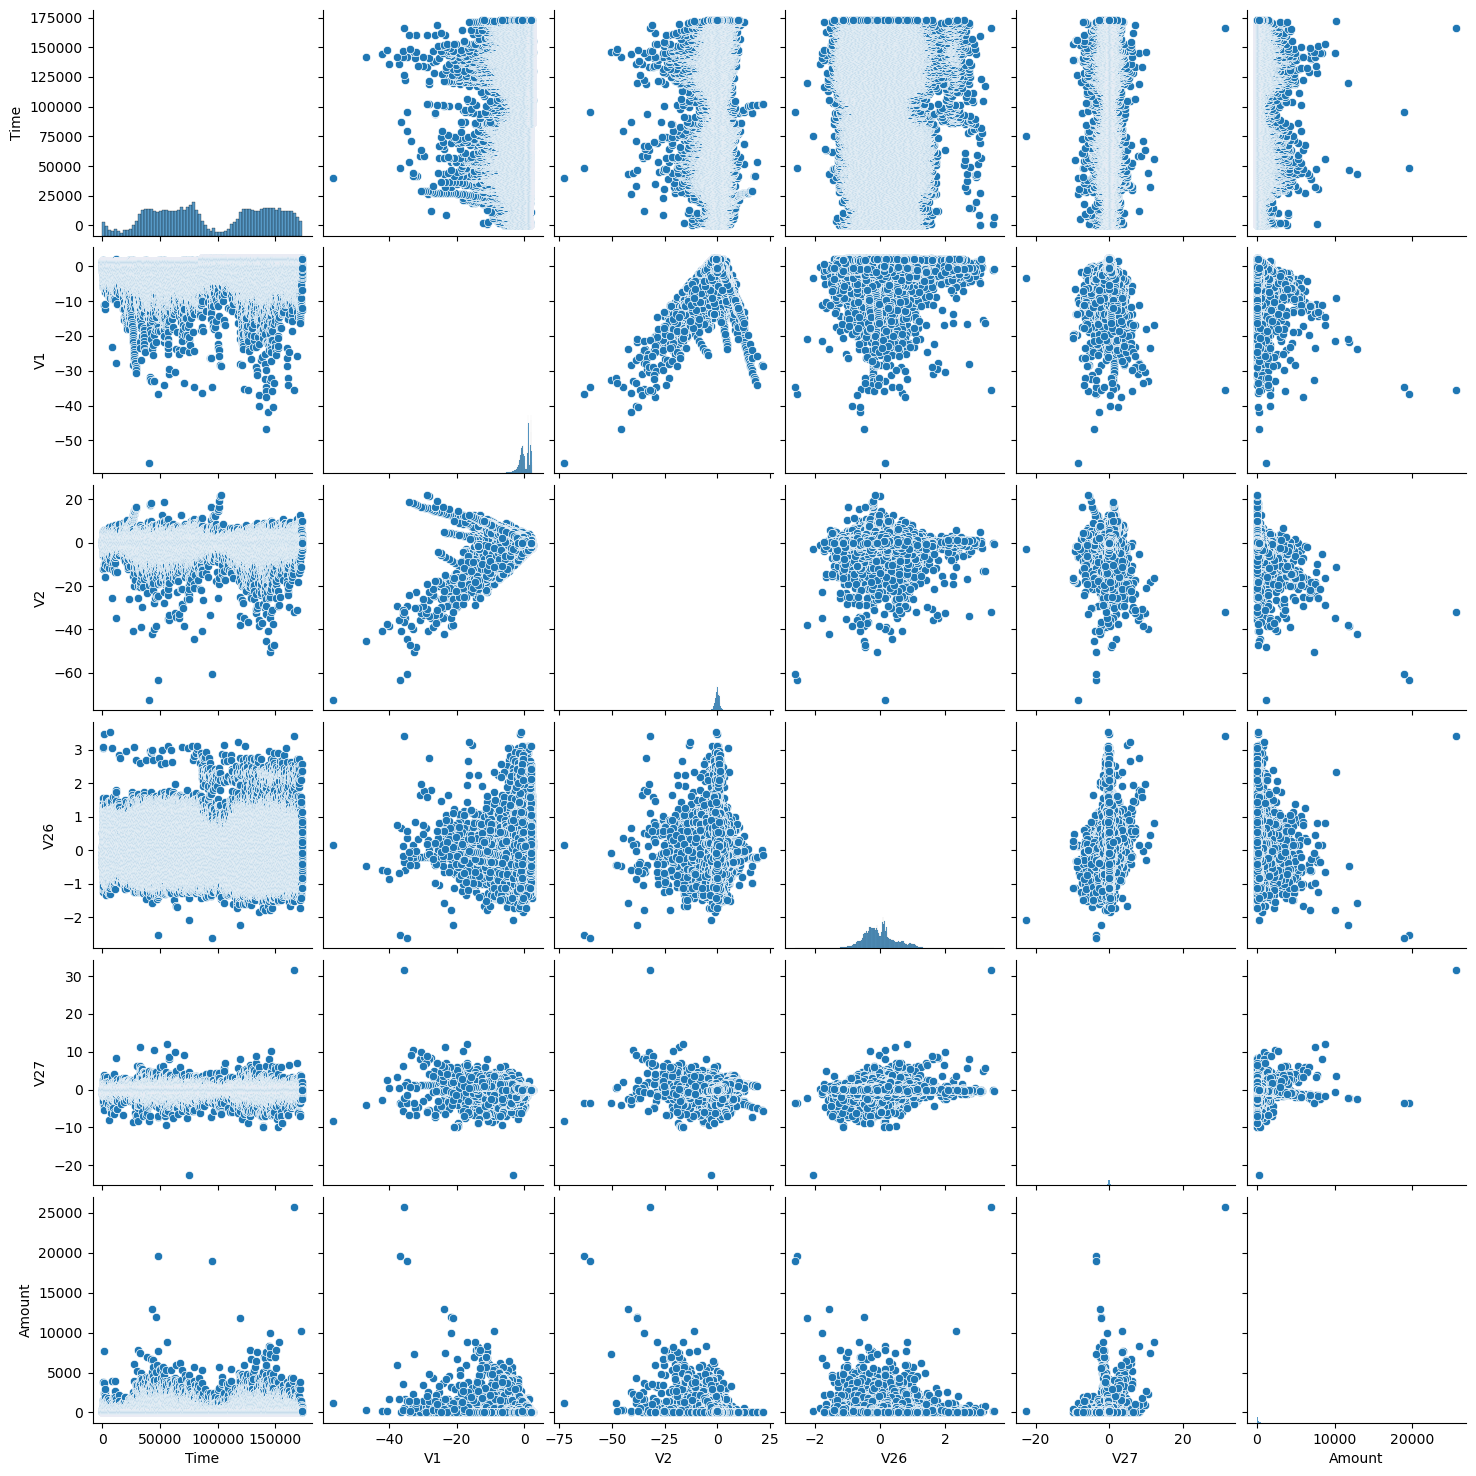

In [13]:
plt.figure(figsize=(15,2))
sns.pairplot(d[['Time',  'V1','V2', 'V26','V27','Amount']])

In [14]:
def binary_columns(dataset):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in dataset.select_dtypes(include=['int', 'float']).columns:
        unique_values = dataset[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

In [15]:
numerical_columns = dataset._get_numeric_data().columns

In [16]:
binary_cols

['Class']

In [17]:
numerical_columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [18]:
# Assuming 'dataset' is your DataFrame and 'column_name' is the name of the column you want to count values in

# Count the occurrences of each unique value in the column
value_counts = dataset['Class'].value_counts()

# Print the value counts
print(value_counts)


Class
0    284315
1       492
Name: count, dtype: int64


In [19]:


# Assuming 'dataset' is your DataFrame

# Check for unique values in each column
unique_columns = dataset.columns[dataset.nunique() == dataset.shape[0]]

# Print the columns with all unique values
print("Columns with all unique values:")
print(unique_columns)


Columns with all unique values:
Index([], dtype='object')


In [20]:
# Reset the index to default numeric index
dataset = dataset.reset_index(drop=True)


In [21]:
d

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [22]:
data_fraud = dataset[dataset['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = dataset[dataset['Class'] == 0]

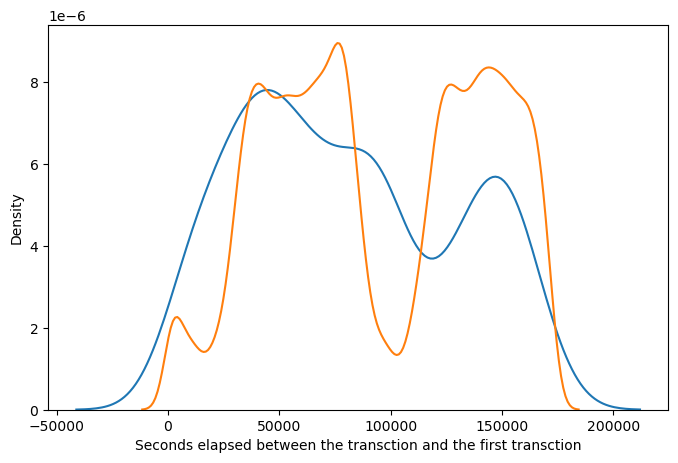

In [23]:
#as comparing the specific pattern having the time in the y axis. 
#as the patters are not similar and way apart from each other for almost all the datapoints,
#hence we can conclude to remove the feature for the better accuracy and the prediction.

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

In [24]:
# Dropping the Time column
dataset.drop('Time', axis=1, inplace=True)

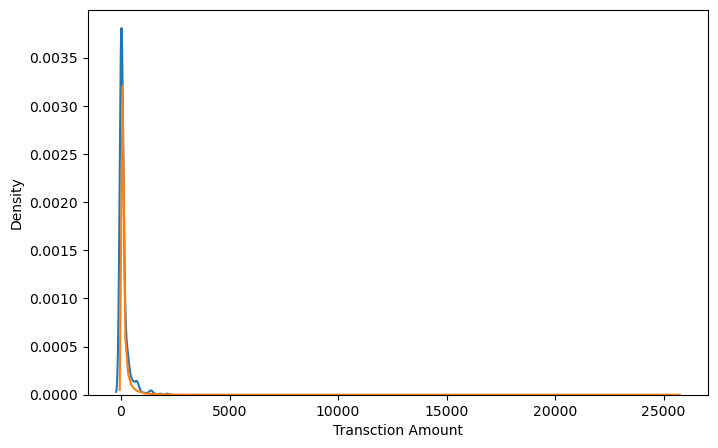

In [25]:
#as comparing the specific pattern having the Amount in the y axis. 
# as the patterns seems to be matching almost nearly, hence it is good to have the "Amount" coloumn as a feature. 

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Amount'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

# Assuming 'dataset' is your DataFrame and you have already defined 'categorical' and 'numerical' lists

# Define features (X) and target (y)
X = dataset.drop(columns=['Class'])  # Assuming 'Class' is your target variable
y = dataset['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [27]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

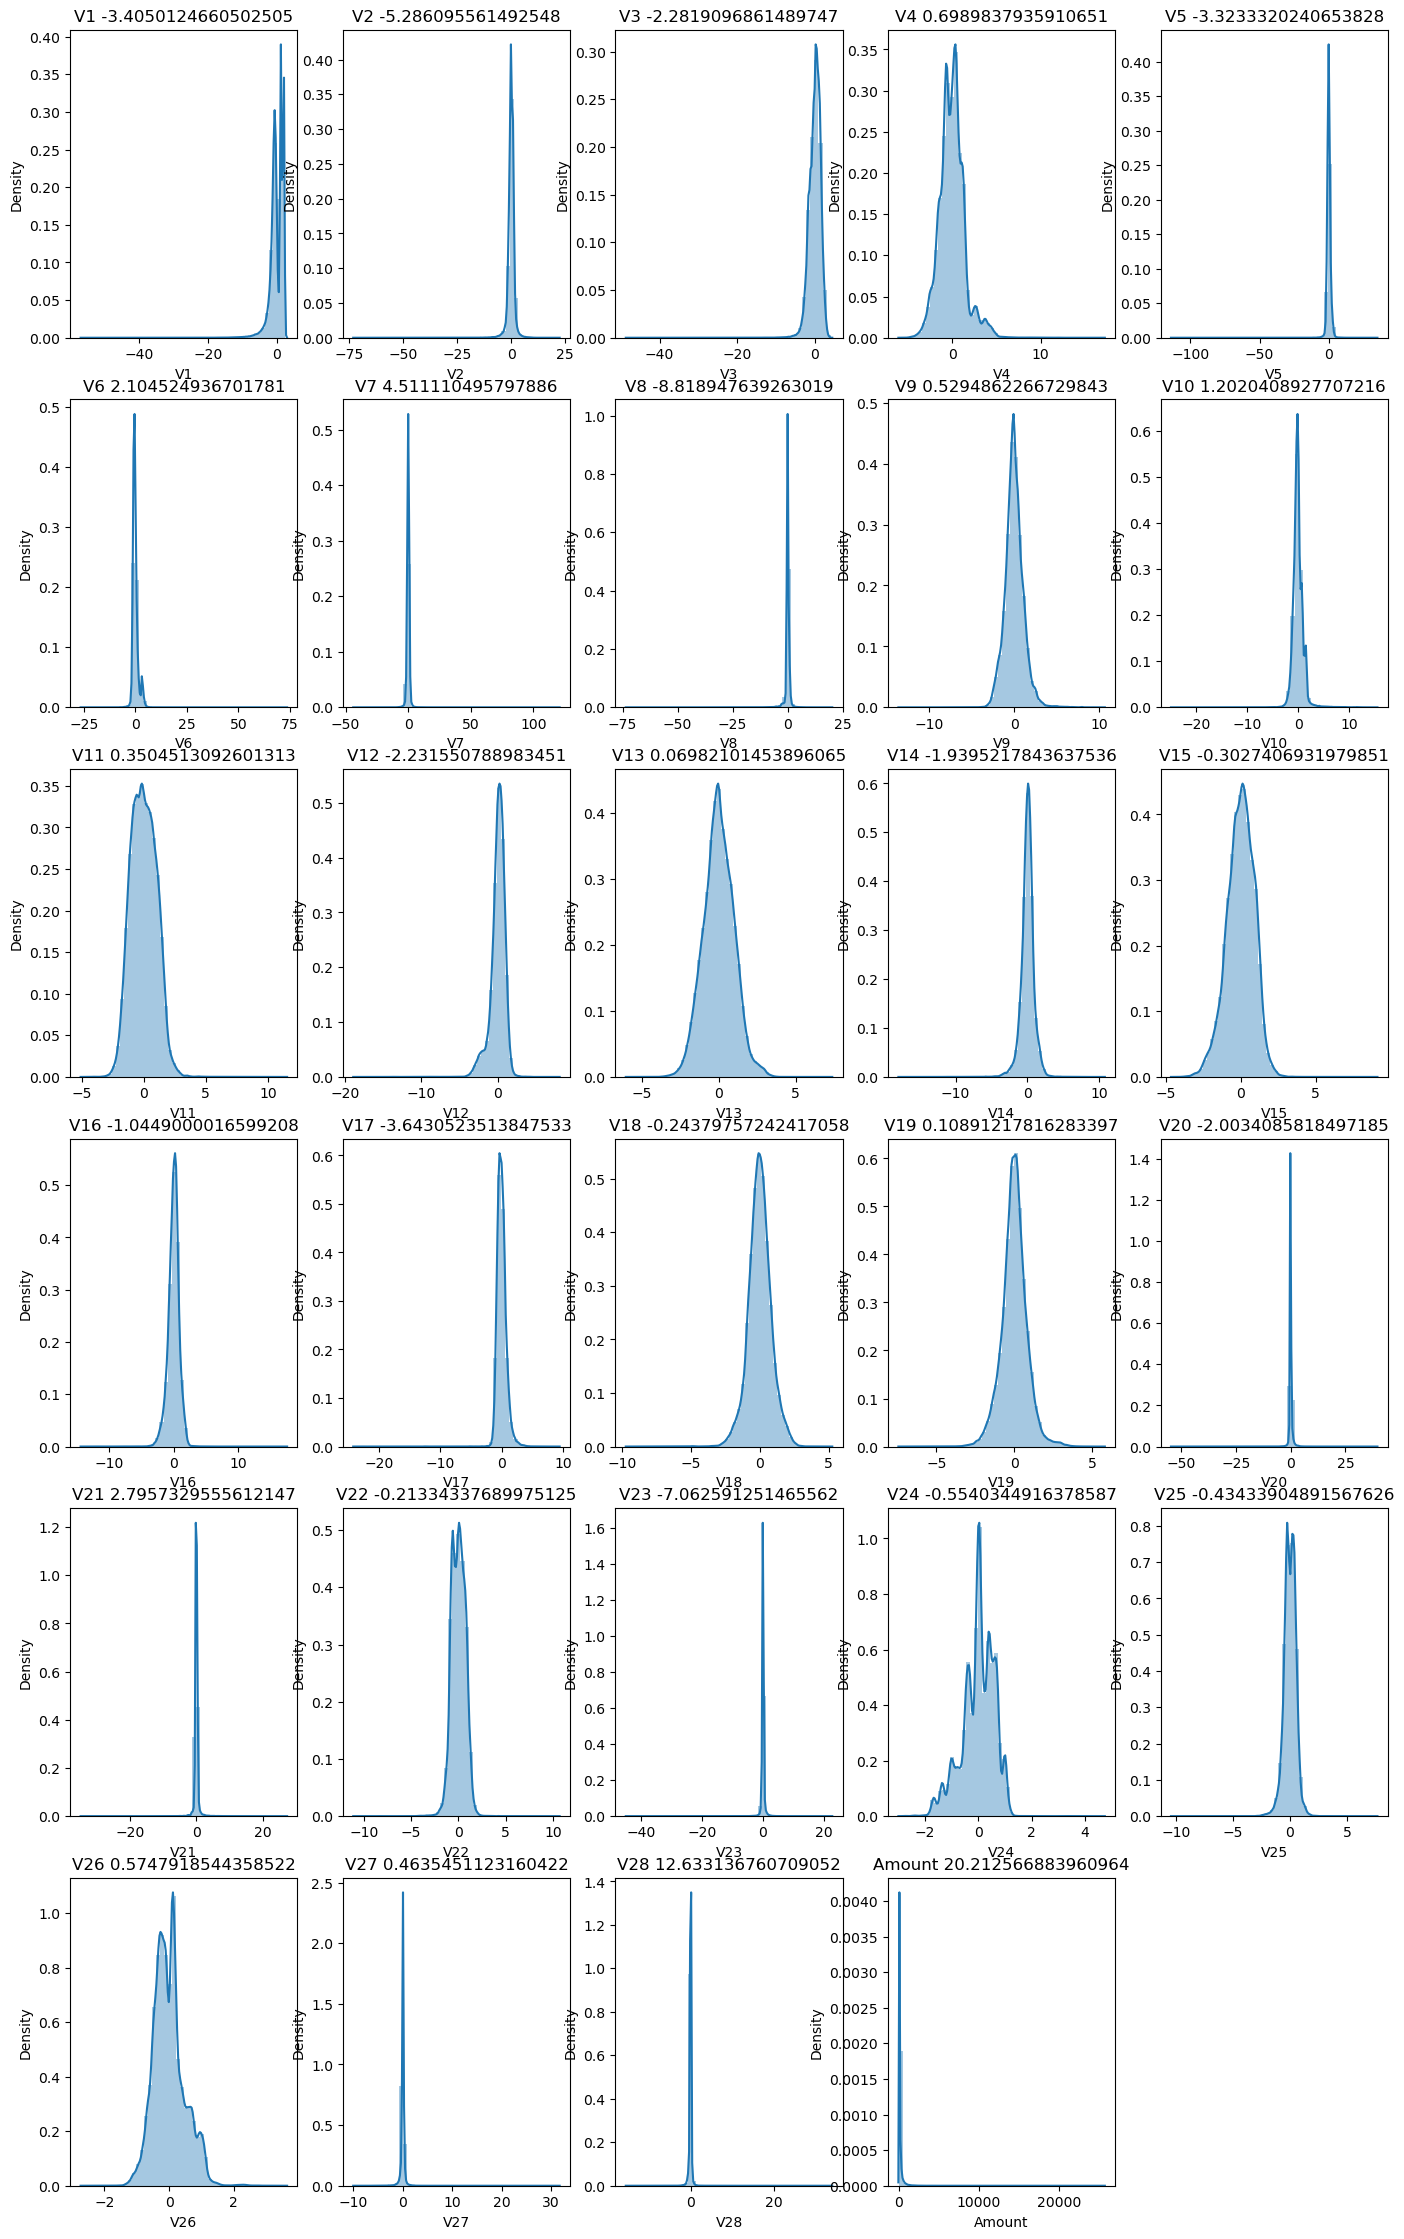

In [28]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

In [29]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [30]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

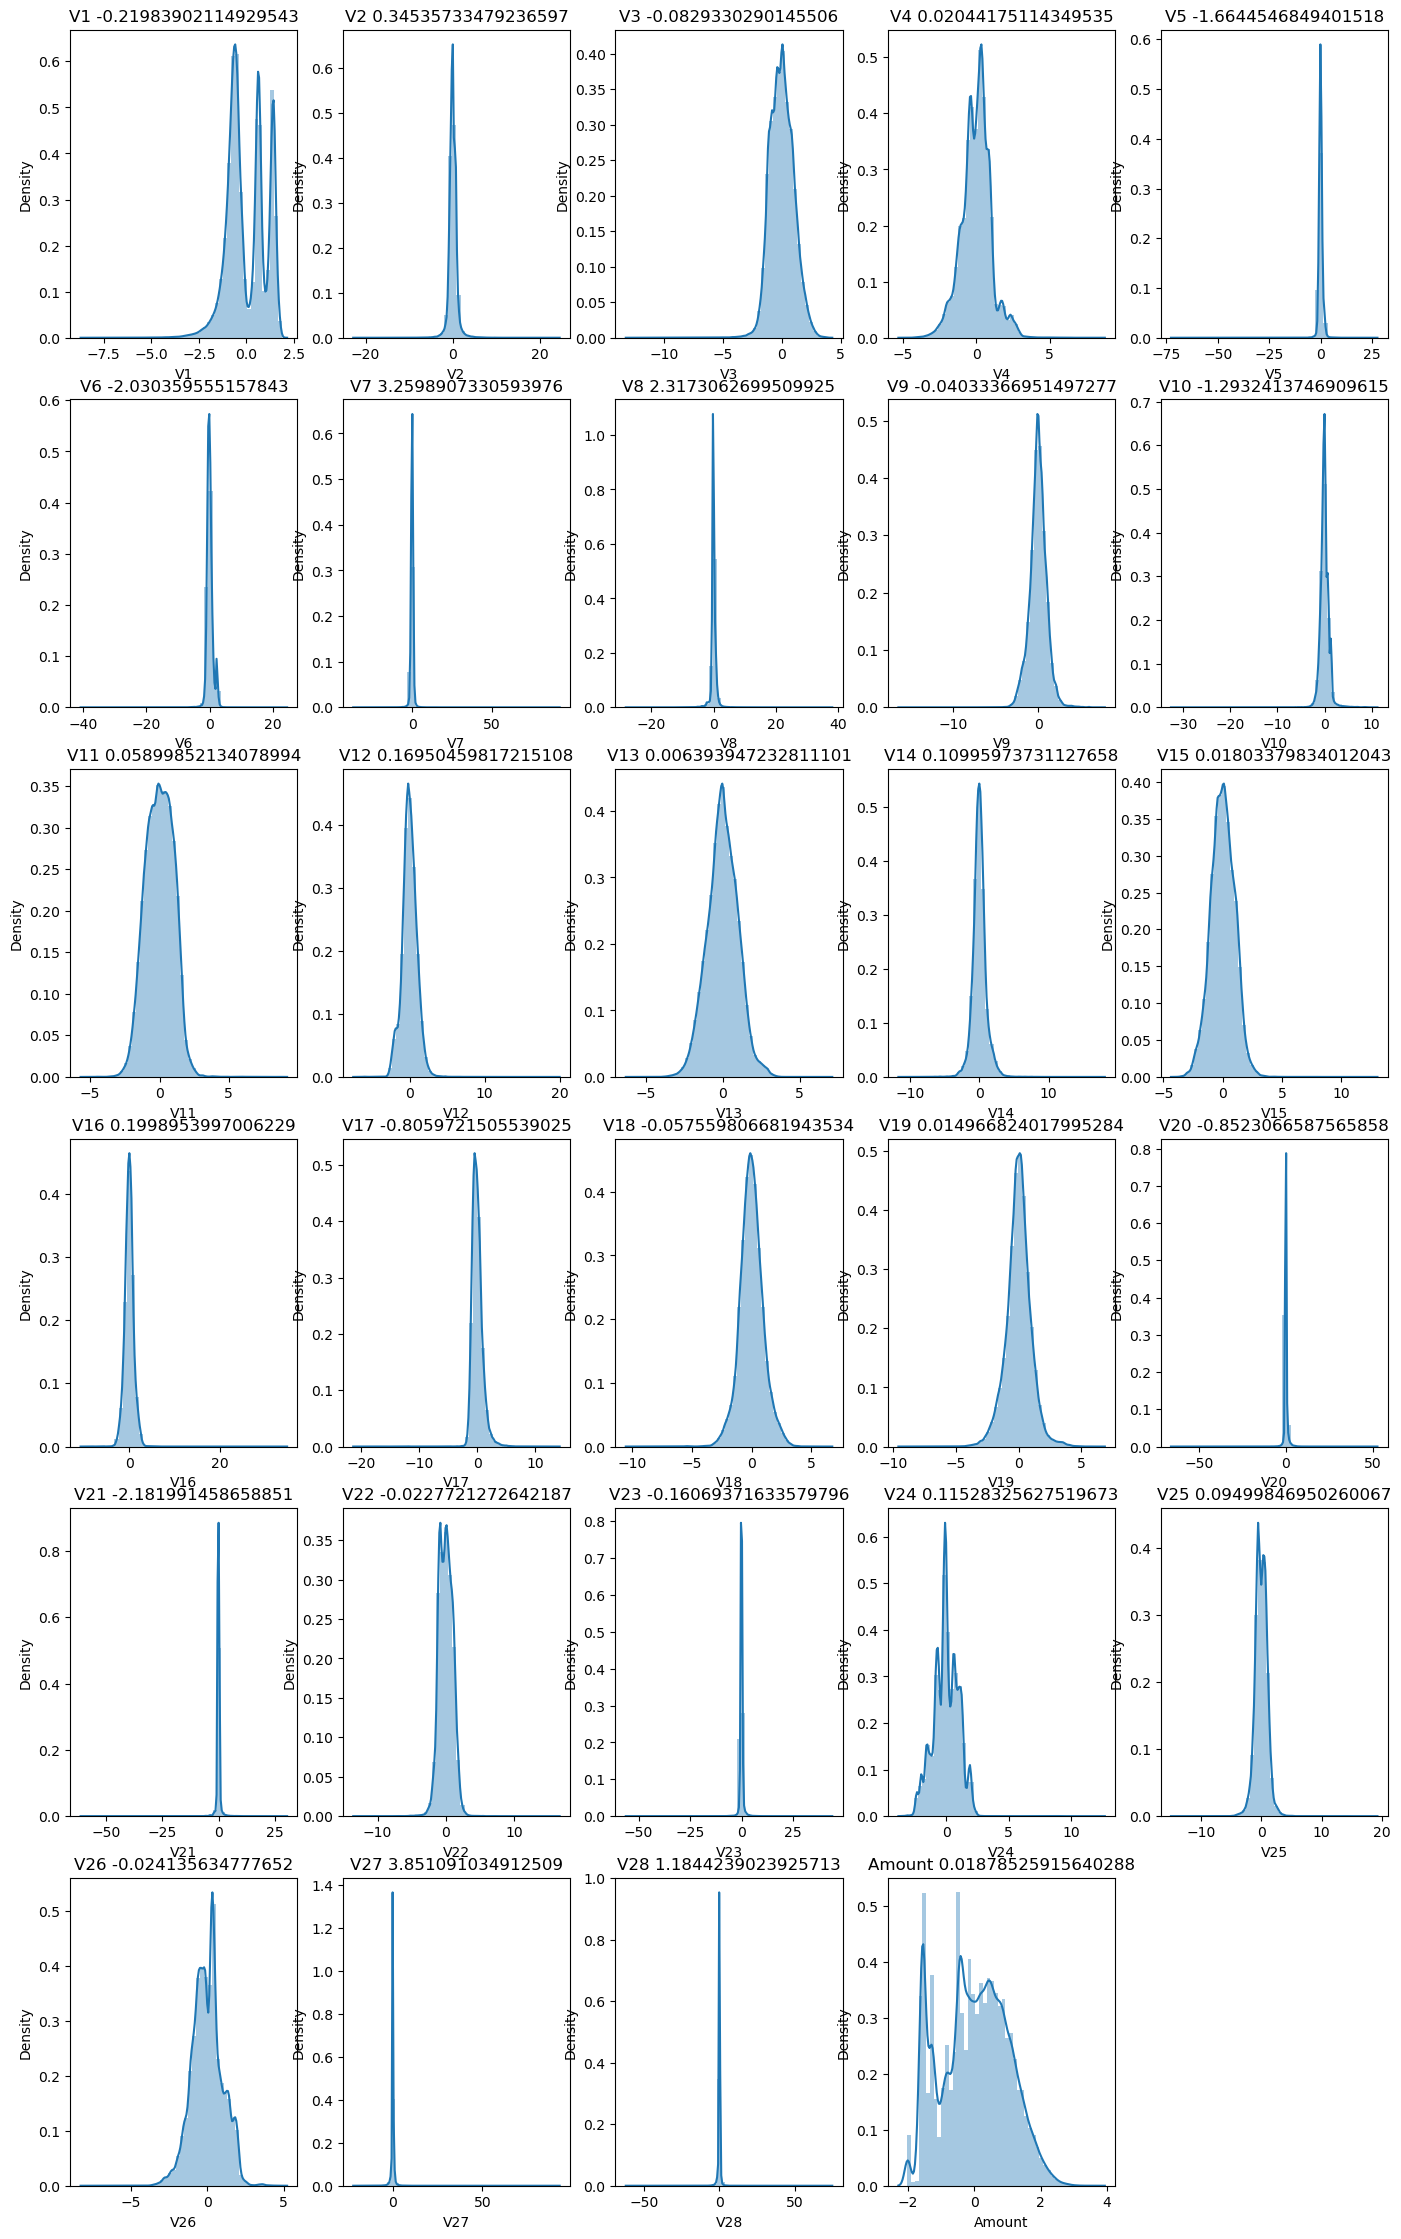

In [31]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

In [32]:
# shall import the required modules from the libraries to scale the features i.e X_train and X_test
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
# Instantiate the Scaler
scaler = StandardScaler()

In [35]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [36]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
164406,-0.959849,-0.674985,0.729841,-0.511753,0.871872,-0.096774,0.145360,0.136060,0.258393,-0.920782,...,0.639447,0.518894,0.573585,0.345192,-0.047359,0.304894,0.665392,-0.063217,0.492115,1.154422
220383,-0.691668,0.930072,2.210573,1.913923,-0.148147,0.257960,0.402178,-0.885805,-0.885067,0.867068,...,-0.458857,1.447793,1.167923,-0.118053,1.681580,-0.662537,0.067219,-0.220624,-0.168168,0.295373
49922,-0.789346,0.328668,0.995809,0.395102,1.808209,2.717408,-0.320413,1.299120,-0.531853,-0.043571,...,-0.039600,-0.080998,-0.527870,-0.481568,1.857851,0.865222,-0.168564,-0.184272,0.294735,-0.353823
181642,1.289684,-0.289184,-1.180661,0.538547,0.069343,-1.028343,0.494057,-0.485800,0.455294,0.145593,...,-0.107225,0.036768,-0.008368,-0.059340,-0.218238,0.315936,0.831733,-0.266047,-0.171434,0.917210
210715,1.411737,-0.060779,-1.106527,0.327236,0.197362,-0.479394,0.016686,-0.119252,0.390222,-0.124614,...,-0.279991,-0.421625,-1.200581,0.575132,1.116745,-0.683559,0.391646,-0.184694,-0.114214,-1.575432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.612065,-0.021947,0.214831,0.399172,-0.225785,-0.065460,-0.129303,0.041805,-0.052997,0.119730,...,-0.203147,-0.242996,-0.794834,0.246224,-0.109824,0.142646,0.317995,-0.057597,0.025020,-1.269672
259178,-0.656259,0.006796,-0.854419,-0.887307,1.411157,2.479764,-0.371898,1.465312,0.411977,-0.592721,...,-0.378633,0.067034,-0.043995,0.376561,1.202463,-2.869705,-1.808098,0.156493,0.431918,0.829335
131932,-0.342095,0.614355,1.138649,0.415333,0.238999,-0.595997,0.863453,-0.445295,-0.413314,-0.156892,...,0.006429,0.088454,0.477222,-0.472337,0.634969,0.431367,-0.826323,-0.302902,-0.599600,-0.937623
146867,-1.449722,1.714515,-1.537365,-3.181928,1.356020,1.849979,-0.376471,2.597020,0.567733,0.019843,...,0.530683,-0.449808,-1.419365,0.217029,1.194158,0.597122,0.918336,1.233878,1.028417,-1.537100


In [37]:
# Fit the data into scaler and transform
X_test['Amount'] = scaler.fit_transform(X_test[['Amount']])
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-4.169927,7.830095,-6.669313,5.214351,-9.348862,-2.693391,-13.805468,11.233574,-9.745001,-17.352818,...,-1.916222,1.597290,-1.524006,-3.551992,1.182803,-2.511531,-0.987802,-4.755549,-3.375306,1.604428
49906,-0.039162,-1.575291,-0.249926,-1.007966,-1.040317,0.829309,-0.418973,0.149414,0.838844,-0.503319,...,0.644321,-0.281463,-1.281838,-0.837476,-1.735725,0.579918,-1.740756,0.094771,0.325485,1.793045
29474,0.813153,-0.449666,-0.035277,-0.713662,-0.398920,0.139031,-0.571167,-0.074775,-0.891866,0.726855,...,0.268964,0.156703,0.216462,-0.277062,-1.296168,0.977325,-0.425553,0.021884,0.027075,0.227394
276481,-0.492852,1.127395,-1.129437,-0.177819,0.557520,-0.427381,0.225689,0.540947,-0.406894,-1.341250,...,-0.313786,0.504573,1.219723,-0.295953,-0.128371,-0.426353,-0.253665,-0.585585,0.018751,-1.388096
278846,1.405943,-0.175638,-0.785031,0.308478,-0.144212,-0.728364,0.038312,-0.231130,0.379120,0.285482,...,-0.327318,-0.316910,-0.850933,0.548153,0.005883,-0.706846,0.448121,-0.197606,-0.205839,-1.577041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,-1.105944,1.497009,1.752510,1.627410,1.113384,1.602394,0.542242,-2.600397,0.786030,1.983505,...,-0.215344,2.741031,-0.297278,0.137223,-1.177076,-0.271320,0.428298,-3.212123,-2.761254,-0.337607
16730,-1.050243,1.059412,0.820116,0.275542,-0.428126,-0.021126,-0.248666,1.205362,-0.946615,0.050718,...,-0.133564,0.316671,0.474688,-0.272122,-0.084038,0.013306,1.644540,0.243321,0.211769,-0.189571
209779,-0.850038,1.041632,-0.141444,-0.406337,-0.134328,-0.844660,0.287329,0.665966,-0.364977,-0.842511,...,-0.355086,-0.217530,-0.929926,0.013450,-0.160569,-0.440369,0.506420,-0.216611,0.186998,-1.270683
41564,-0.988537,1.228620,0.396015,0.813245,-0.814958,-0.303858,-0.597566,1.360224,-1.084694,-0.404756,...,-0.408664,0.383536,0.400372,0.087279,0.875530,-0.974181,-1.057327,-1.048593,-0.187323,-0.659578


In [38]:
d.shape

(284807, 31)

In [39]:
#import randomforestclassifier from scikit learn, since we are solving a classification problem
from sklearn.ensemble import RandomForestClassifier
#Classification report gives us the results of our model
from sklearn.metrics import classification_report

In [40]:
#load the classifier, n_jobs is the parameter to set how many jobs to run in parallel. -1 mean using just 1 processor
clf = RandomForestClassifier(n_jobs=-1)
#calling .fit() on the training data runs the model on the training data.
clf.fit(X_train,y_train.values.ravel())
# .predict() makes the prediction from the trained model
pred=clf.predict(X_test)

#prints "-" 50 times for visual effect 
print("-"*50)


print("Random forest classifier results")


#prints out classification report



print(classification_report(y_test.values,pred))

--------------------------------------------------
Random forest classifier results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113732
           1       0.92      0.80      0.85       191

    accuracy                           1.00    113923
   macro avg       0.96      0.90      0.93    113923
weighted avg       1.00      1.00      1.00    113923



In [41]:

# class weights are added to our Random forest classifier by just adding a class_weight parameter
# in the function call, now class 1 will have 4 times more weightage than the 0 class hence
# 4 times more penalty for the model for bad classification of class 1.  Lets see if we do better than the earlier results
clf = RandomForestClassifier(n_jobs=-1, class_weight={0:1,1:4})

#fits the model with given class weight above.
clf.fit(X_train,y_train.values.ravel())

#makes a prediction
pred=clf.predict(X_test)

print("-"*50)

print("Random forest classifier results")

print(classification_report(y_test.values,pred))


--------------------------------------------------
Random forest classifier results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113732
           1       0.95      0.79      0.86       191

    accuracy                           1.00    113923
   macro avg       0.97      0.89      0.93    113923
weighted avg       1.00      1.00      1.00    113923



In [42]:
# Random forest was tried for model building. By the observation, as few of the hyperparameter tuning for oversampling technique doesn't work.
#random forest is not very efficient with large number of datapoints 
#beacuse it takes lot of computational power and resources to make the transformation.

In [43]:
#Creating models with oversampling

In [44]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score




In [45]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [46]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [47]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 170583, 1: 301})
New class distribution:- Counter({0: 170583, 1: 170583})


In [48]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [49]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.857604,1.966723,0.272033,0.473795,0.01,{'C': 0.01},0.986814,0.985574,0.986541,0.985697,...,0.986141,0.000476,6,0.986158,0.986189,0.986088,0.986225,0.986130,0.986158,0.000047
1,0.803506,0.061411,0.556354,1.073670,0.1,{'C': 0.1},0.987021,0.985833,0.986764,0.985959,...,0.986381,0.000455,5,0.986398,0.986416,0.986326,0.986456,0.986371,0.986393,0.000044
2,0.806962,0.015870,0.024997,0.007657,1,{'C': 1},0.987044,0.985857,0.986790,0.985991,...,0.986407,0.000454,4,0.986426,0.986444,0.986353,0.986481,0.986397,0.986420,0.000043
3,0.829807,0.068541,0.028124,0.006249,10,{'C': 10},0.987043,0.985860,0.986791,0.985994,...,0.986409,0.000453,3,0.986429,0.986447,0.986356,0.986484,0.986400,0.986423,0.000043
4,0.856486,0.119833,0.028129,0.011695,100,{'C': 100},0.987044,0.985860,0.986791,0.985994,...,0.986409,0.000453,2,0.986429,0.986447,0.986356,0.986484,0.986400,0.986423,0.000043
5,0.810176,0.036545,0.028120,0.006247,1000,{'C': 1000},0.987044,0.985860,0.986792,0.985994,...,0.986409,0.000453,1,0.986429,0.986447,0.986356,0.986484,0.986400,0.986423,0.000043


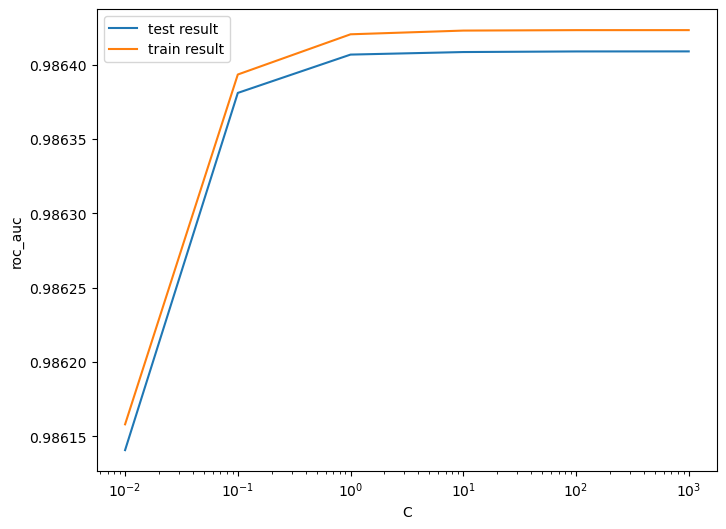

In [50]:
# plotting C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [51]:
# Best score with best C
best_score = model_cv.best_score_

best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9864089533169631 at C = 1000


In [52]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=1000)

In [53]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

In [54]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [55]:
#to know the system version. 
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [56]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[166140   4443]
 [ 12913 157670]]


In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [58]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [59]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9491274042548202
Sensitivity:- 0.9243007802653254
Specificity:- 0.9739540282443151
F1-Score:- 0.9478322552720803


In [60]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    170583
           1       0.97      0.92      0.95    170583

    accuracy                           0.95    341166
   macro avg       0.95      0.95      0.95    341166
weighted avg       0.95      0.95      0.95    341166



In [61]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [62]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9864166018006473

In [63]:
#alternate way of importing the libraries if the specific module has been expired the current version in a specific libraries. 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def draw_roc(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


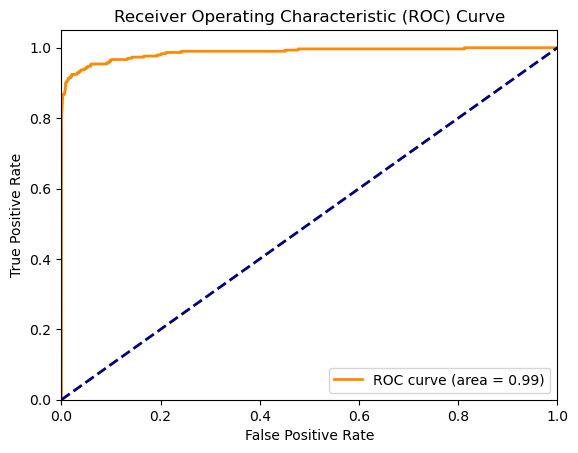

In [64]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [65]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

In [66]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[110692   3040]
 [    17    174]]


In [67]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [110]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))



Accuracy:- 0.9996225520746469
Sensitivity:- 0.8167539267015707
Specificity:- 0.9999296591988183


In [69]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    113732
           1       0.05      0.91      0.10       191

    accuracy                           0.97    113923
   macro avg       0.53      0.94      0.54    113923
weighted avg       1.00      0.97      0.98    113923



In [70]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [71]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9836138847953939

In [72]:
#alternate way of importing the libraries if the specific module has been expired the current version in a specific libraries. 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def draw_roc(y_test, y_test_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


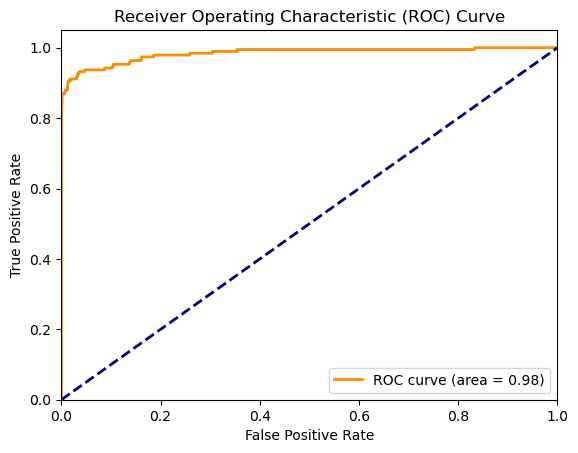

In [73]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [74]:
# XGBoost

In [75]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [76]:
# Importing XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [77]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [78]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.295079,0.898138,0.078125,0.022099,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.964070,0.976762,0.973359,0.971397,0.005364,4,0.999879,0.999885,0.999876,0.999880,0.000004
1,1.792825,0.218768,0.057292,0.007364,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.971687,0.986031,0.972921,0.976880,0.006491,1,0.999956,0.999988,0.999990,0.999978,0.000015
2,1.516497,0.019657,0.073028,0.007445,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.962810,0.987100,0.972807,0.974239,0.009968,2,0.999950,0.999976,0.999992,0.999973,0.000017
3,1.625180,0.096549,0.057290,0.007366,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.964830,0.961293,0.967807,0.964643,0.002663,6,0.999988,1.000000,1.000000,0.999996,0.000006
4,1.820828,0.154766,0.062499,0.012758,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.966113,0.978984,0.974987,0.973361,0.005379,3,1.000000,1.000000,1.000000,1.000000,0.000000
5,1.610329,0.033208,0.057525,0.014568,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.955869,0.981815,0.971193,0.969626,0.010650,5,1.000000,1.000000,1.000000,1.000000,0.000000


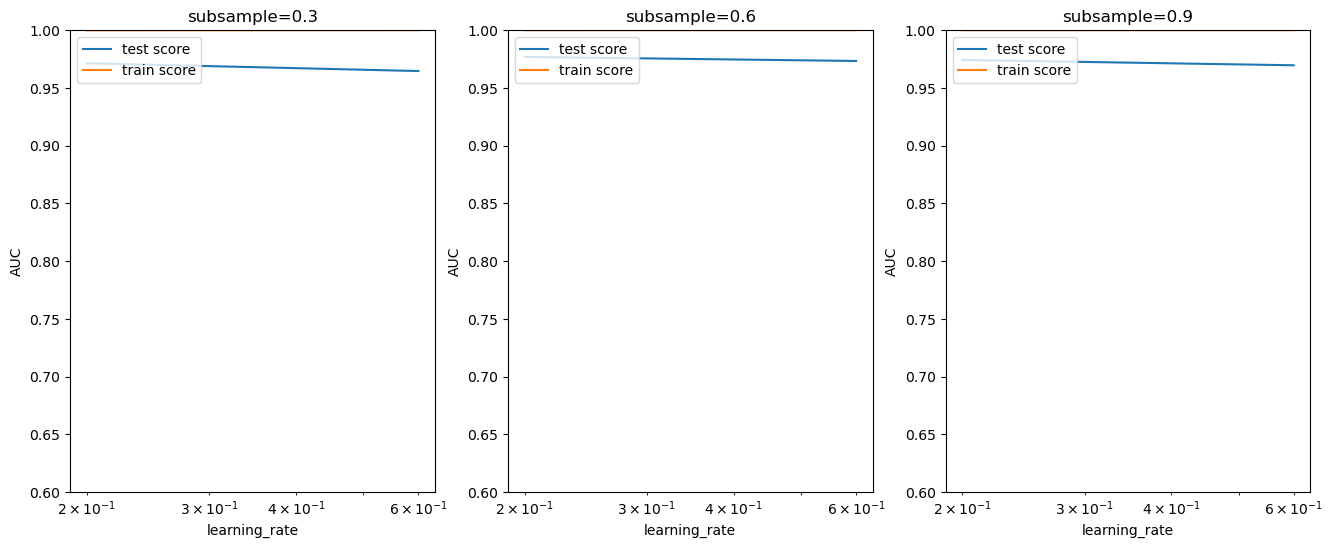

In [79]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [80]:
model_cv.best_params_
##### Model with optimal hyperparameters
#We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

{'learning_rate': 0.2, 'subsample': 0.6}

In [81]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [82]:
#XGBoost has started, above we have got the paramenters and need to choose. ignore the above, consider when required 
from xgboost import XGBClassifier

xgb_bal_ros_model = XGBClassifier()

xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

y_train_pred = xgb_bal_ros_model.predict(X_train_ros)



In [83]:
#Prediction on the training data set.
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [84]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[170583      0]
 [     0 170583]]


In [85]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [87]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170583
           1       1.00      1.00      1.00    170583

    accuracy                           1.00    341166
   macro avg       1.00      1.00      1.00    341166
weighted avg       1.00      1.00      1.00    341166



In [88]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [89]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

1.0

In [269]:
#alternate way of importing the libraries if the specific module has been expired the current version in a specific libraries. 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def draw_roc(y_train_ros, y_train_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_train_ros, y_train_pred_proba)
    roc_au8c = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_au8c)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [270]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

ValueError: Found input variables with inconsistent numbers of samples: [341166, 341138]

In [92]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [93]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[113724      8]
 [    35    156]]


In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9996225520746469
Sensitivity:- 0.8167539267015707
Specificity:- 0.9999296591988183
F1-Score:- 0.8788732394366197


In [96]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113732
           1       0.95      0.82      0.88       191

    accuracy                           1.00    113923
   macro avg       0.98      0.91      0.94    113923
weighted avg       1.00      1.00      1.00    113923



In [97]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [98]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9815220515649631

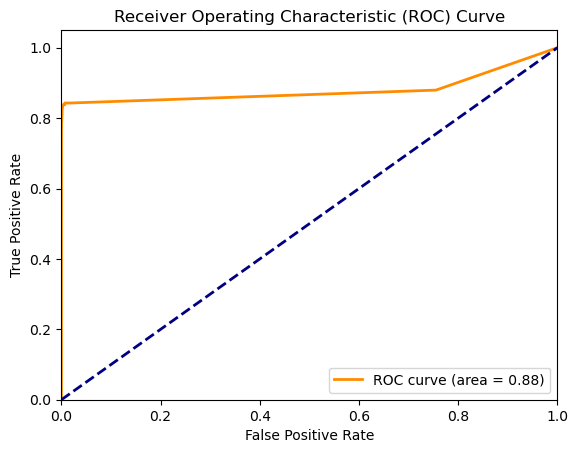

In [143]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [106]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [118]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [119]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.841278,0.068157,0.040181,0.007444,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.984167,0.985527,0.987076,0.985590,0.001189,6
1,2.804792,0.079479,0.044757,0.006148,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.984167,0.985527,0.987096,0.985596,0.001197,5
2,2.793135,0.132905,0.032118,0.008458,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.984154,0.985440,0.986924,0.985506,0.001132,8
3,2.684069,0.070685,0.037736,0.006646,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.984167,0.985440,0.986924,0.985510,0.001127,7
4,4.792384,0.159863,0.036465,0.007371,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998126,0.997916,0.998172,0.998071,0.000111,4
5,4.722973,0.016235,0.041630,0.007339,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998145,0.997966,0.998135,0.998082,0.000082,3
6,4.693516,0.103049,0.031244,0.000006,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998127,0.998112,0.998281,0.998173,0.000076,1
7,4.600281,0.090597,0.036458,0.007367,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998145,0.998097,0.998263,0.998168,0.000070,2


In [120]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9981734562568475
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [121]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [122]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [123]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[169315   1268]
 [  1086 169497]]


In [124]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9931001330730495
Sensitivity:- 1.0
Specificity:- 1.0


In [125]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    170583
           1       0.99      0.99      0.99    170583

    accuracy                           0.99    341166
   macro avg       0.99      0.99      0.99    341166
weighted avg       0.99      0.99      0.99    341166



In [126]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [127]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9983093795642238

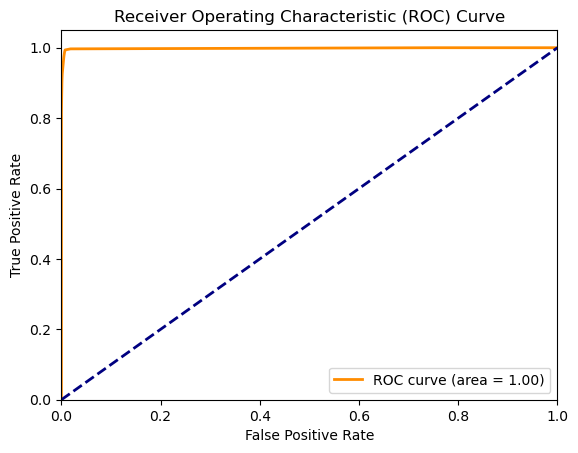

In [132]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [134]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

In [135]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[112852    880]
 [    30    161]]


In [136]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [137]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9920121485564811
Sensitivity:- 0.8429319371727748
Specificity:- 0.9922625118700102


In [138]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    113732
           1       0.15      0.84      0.26       191

    accuracy                           0.99    113923
   macro avg       0.58      0.92      0.63    113923
weighted avg       1.00      0.99      0.99    113923



In [139]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [140]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8799563794963562

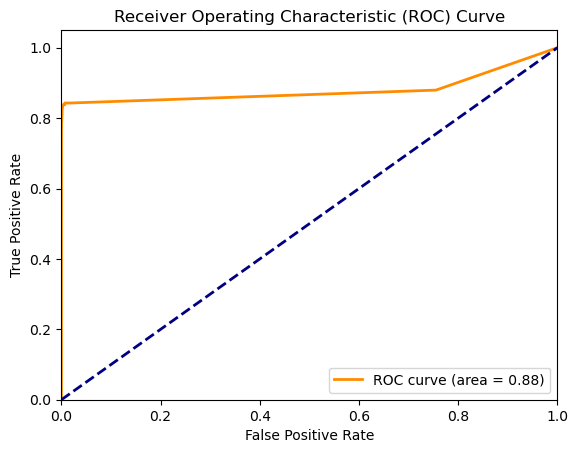

In [144]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [145]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [154]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [155]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (170884, 29)
After SMOTE oversampling X_train shape= (341166, 29)


In [156]:
# Logistic Regression

In [157]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [158]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.779524,0.040066,0.028132,0.006769,0.01,{'C': 0.01},0.989267,0.989148,0.989562,0.988855,...,0.989366,0.000389,6,0.989510,0.989330,0.989349,0.989457,0.989244,0.989378,0.000095
1,0.803566,0.055004,0.037215,0.022331,0.1,{'C': 0.1},0.989450,0.989348,0.989747,0.989038,...,0.989551,0.000385,5,0.989696,0.989511,0.989535,0.989638,0.989434,0.989563,0.000093
2,0.803868,0.027207,0.038221,0.014344,1,{'C': 1},0.989468,0.989370,0.989769,0.989058,...,0.989571,0.000384,4,0.989717,0.989531,0.989556,0.989657,0.989455,0.989583,0.000093
3,0.795514,0.052138,0.042952,0.015598,10,{'C': 10},0.989470,0.989372,0.989771,0.989060,...,0.989573,0.000384,3,0.989719,0.989533,0.989558,0.989659,0.989457,0.989585,0.000093
4,0.760570,0.024452,0.031936,0.017155,100,{'C': 100},0.989470,0.989372,0.989771,0.989060,...,0.989573,0.000384,2,0.989719,0.989533,0.989558,0.989659,0.989457,0.989585,0.000093
5,0.783083,0.034893,0.022724,0.007132,1000,{'C': 1000},0.989470,0.989372,0.989771,0.989060,...,0.989573,0.000384,1,0.989719,0.989533,0.989558,0.989659,0.989457,0.989585,0.000093


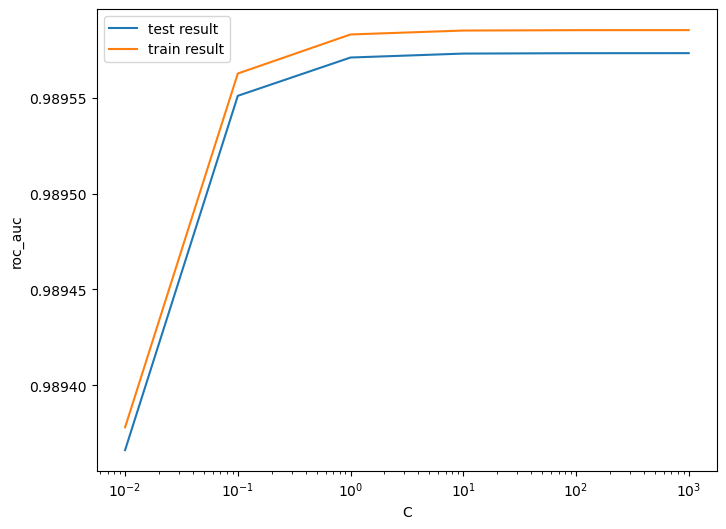

In [159]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [160]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.989573225391057 at C = 1000


In [162]:
# Logistic regression with optimal C

In [163]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [164]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

In [165]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [166]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[165779   4804]
 [ 12721 157862]]


In [167]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [168]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9486320442248055
Sensitivity:- 0.9254263320495009
Specificity:- 0.9718377564001102


In [169]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    170583
           1       0.97      0.93      0.95    170583

    accuracy                           0.95    341166
   macro avg       0.95      0.95      0.95    341166
weighted avg       0.95      0.95      0.95    341166



In [170]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

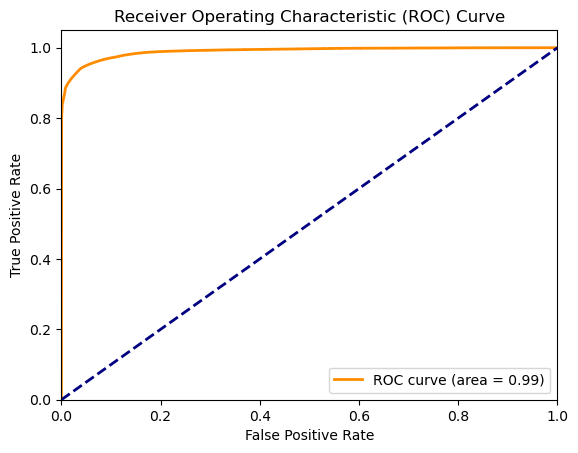

In [171]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

In [172]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [173]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[110495   3237]
 [    16    175]]


In [174]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [175]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9714456255541023
Sensitivity:- 0.9162303664921466
Specificity:- 0.9715383533218444


In [176]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    113732
           1       0.05      0.92      0.10       191

    accuracy                           0.97    113923
   macro avg       0.53      0.94      0.54    113923
weighted avg       1.00      0.97      0.98    113923



In [177]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

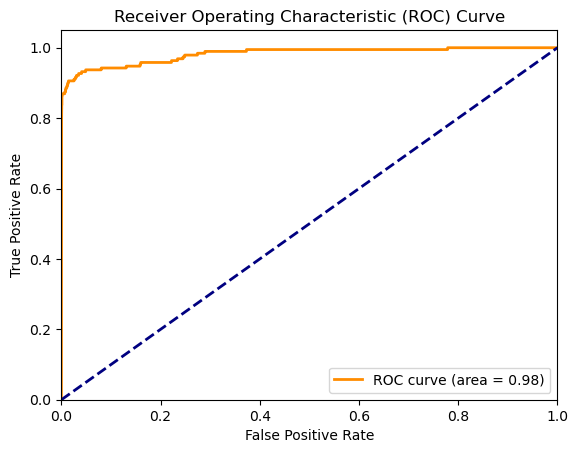

In [178]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [179]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [180]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [181]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 170583, 1: 301})
New class distribution:- Counter({0: 170583, 1: 170555})


In [182]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [183]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.594782,0.038778,0.042174,0.006627,0.01,{'C': 0.01},0.965909,0.965543,0.965690,0.965714,0.000150,6,0.965768,0.965678,0.965808,0.965752,0.000054
1,0.615565,0.034914,0.054932,0.005394,0.1,{'C': 0.1},0.966283,0.965918,0.966047,0.966083,0.000151,5,0.966132,0.966053,0.966181,0.966122,0.000053
2,0.598859,0.048459,0.050836,0.003048,1,{'C': 1},0.966314,0.965950,0.966077,0.966114,0.000151,4,0.966163,0.966085,0.966212,0.966153,0.000052
3,0.644244,0.046017,0.041425,0.004195,10,{'C': 10},0.966317,0.965953,0.966080,0.966117,0.000151,3,0.966166,0.966088,0.966215,0.966156,0.000052
4,0.666348,0.065896,0.049405,0.004991,100,{'C': 100},0.966317,0.965954,0.966080,0.966117,0.000150,2,0.966166,0.966089,0.966215,0.966157,0.000052
5,0.639976,0.018382,0.053590,0.007718,1000,{'C': 1000},0.966317,0.965954,0.966080,0.966117,0.000151,1,0.966166,0.966089,0.966216,0.966157,0.000052


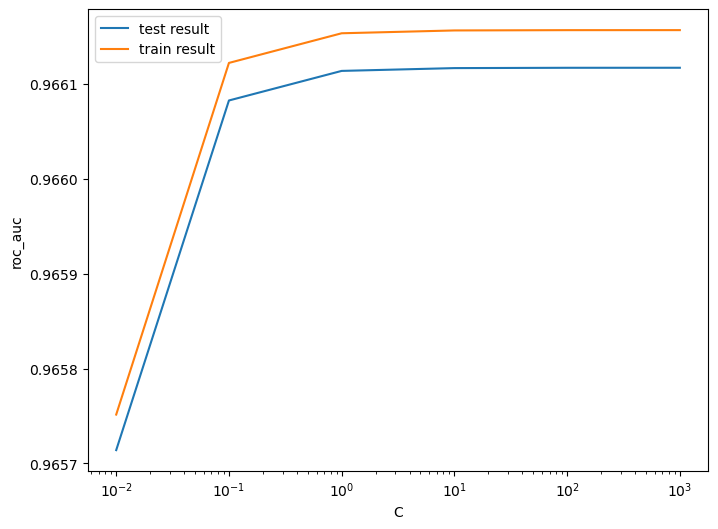

In [184]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [185]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9661170647254881 at C = 1000


In [186]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [187]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

In [188]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [189]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[156300  14283]
 [ 18660 151895]]


In [190]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [191]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.9034320421647545
Sensitivity:- 0.8905924774999268
Specificity:- 0.9162694993053235
F1-Score:- 0.9021687806065934


In [192]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90    170583
           1       0.91      0.89      0.90    170555

    accuracy                           0.90    341138
   macro avg       0.90      0.90      0.90    341138
weighted avg       0.90      0.90      0.90    341138



In [193]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [194]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9661499087494156

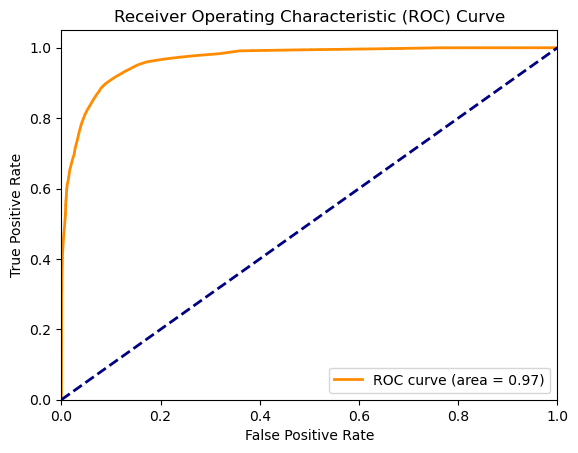

In [199]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [200]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [201]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[104092   9640]
 [    12    179]]


In [202]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [203]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9152761075463252
Sensitivity:- 0.93717277486911
Specificity:- 0.9152393345760208


In [204]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    113732
           1       0.02      0.94      0.04       191

    accuracy                           0.92    113923
   macro avg       0.51      0.93      0.50    113923
weighted avg       1.00      0.92      0.95    113923



In [205]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [206]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9818872897302614

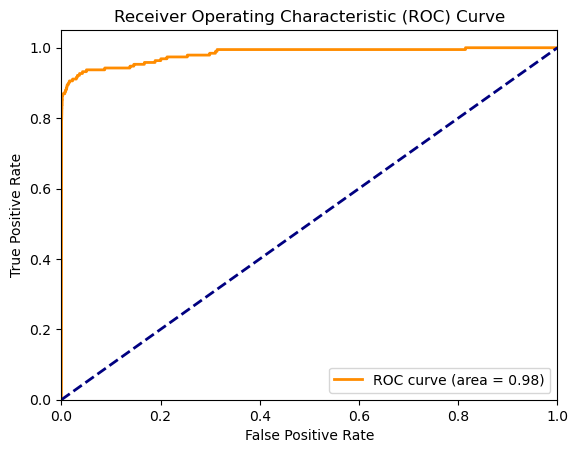

In [209]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [210]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [211]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.465026,0.079852,0.036245,0.005790,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.890290,0.903638,0.914861,0.902930,0.010043,7
1,4.370911,0.187516,0.031707,0.000635,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.888850,0.902483,0.914861,0.902065,0.010623,8
2,4.308050,0.034176,0.035879,0.006550,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.887324,0.915413,0.914714,0.905817,0.013079,5
3,4.230344,0.043950,0.031226,0.000046,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.888746,0.909955,0.914737,0.904479,0.011295,6
4,7.629754,0.037986,0.031224,0.000042,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.893692,0.932760,0.940316,0.922256,0.020432,3
5,7.733694,0.258289,0.031302,0.000046,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.893889,0.931799,0.940318,0.922002,0.020181,4
6,7.623572,0.130219,0.038106,0.006545,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.894582,0.952049,0.947232,0.931288,0.026029,2
7,7.640063,0.274881,0.036524,0.007396,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.900723,0.953460,0.941518,0.931900,0.022578,1


In [212]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9319004984348472
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [213]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [214]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [215]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[164583   6000]
 [  1782 168773]]


In [216]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [217]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9771881174187572
Sensitivity:- 0.9895517574975814
Specificity:- 0.9648265067445173


In [218]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    170583
           1       0.97      0.99      0.98    170555

    accuracy                           0.98    341138
   macro avg       0.98      0.98      0.98    341138
weighted avg       0.98      0.98      0.98    341138



In [220]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [221]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9936633379399378

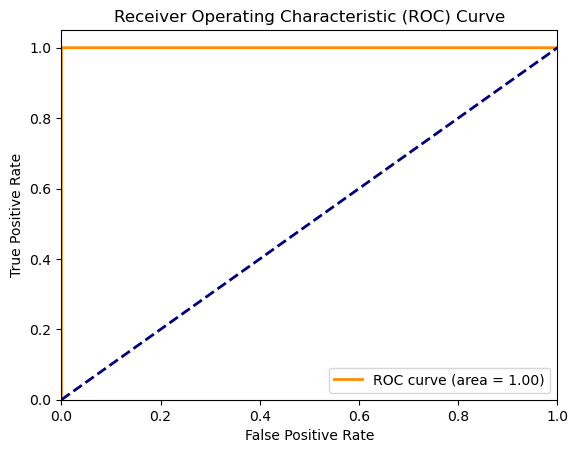

In [275]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [227]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [228]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[109457   4275]
 [    21    170]]


In [229]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [230]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9622903188996076
Sensitivity:- 0.8900523560209425
Specificity:- 0.9624116343685155


In [231]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    113732
           1       0.04      0.89      0.07       191

    accuracy                           0.96    113923
   macro avg       0.52      0.93      0.53    113923
weighted avg       1.00      0.96      0.98    113923



In [232]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [233]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.949043728776919

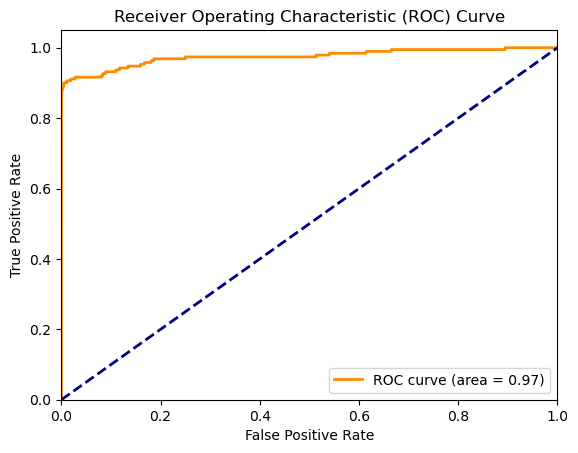

In [274]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [237]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)  

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [238]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.951711,0.217599,0.099332,5.260379e-03,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.987484,0.992042,0.989826,0.989784,0.001861,6,0.999404,0.999295,0.999131,0.999277,0.000112
1,3.257081,0.481616,0.111480,1.743511e-02,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.988074,0.991865,0.990476,0.990139,0.001566,4,0.999360,0.999163,0.999251,0.999258,0.000081
2,2.909764,0.160316,0.091769,6.584572e-03,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.986917,0.992400,0.990103,0.989807,0.002248,5,0.999334,0.999220,0.999152,0.999235,0.000075
3,3.030733,0.265573,0.090577,4.485324e-03,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.988130,0.995040,0.998170,0.993780,0.004194,2,0.999960,0.999963,0.999967,0.999963,0.000003
4,2.907974,0.107435,0.111802,2.259671e-03,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.993549,0.993269,0.996911,0.994576,0.001655,1,0.999973,0.999964,0.999958,0.999965,0.000006
5,3.087146,0.287966,0.093749,8.778064e-07,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.991999,0.991746,0.996540,0.993428,0.002203,3,0.999970,0.999976,0.999986,0.999978,0.000006


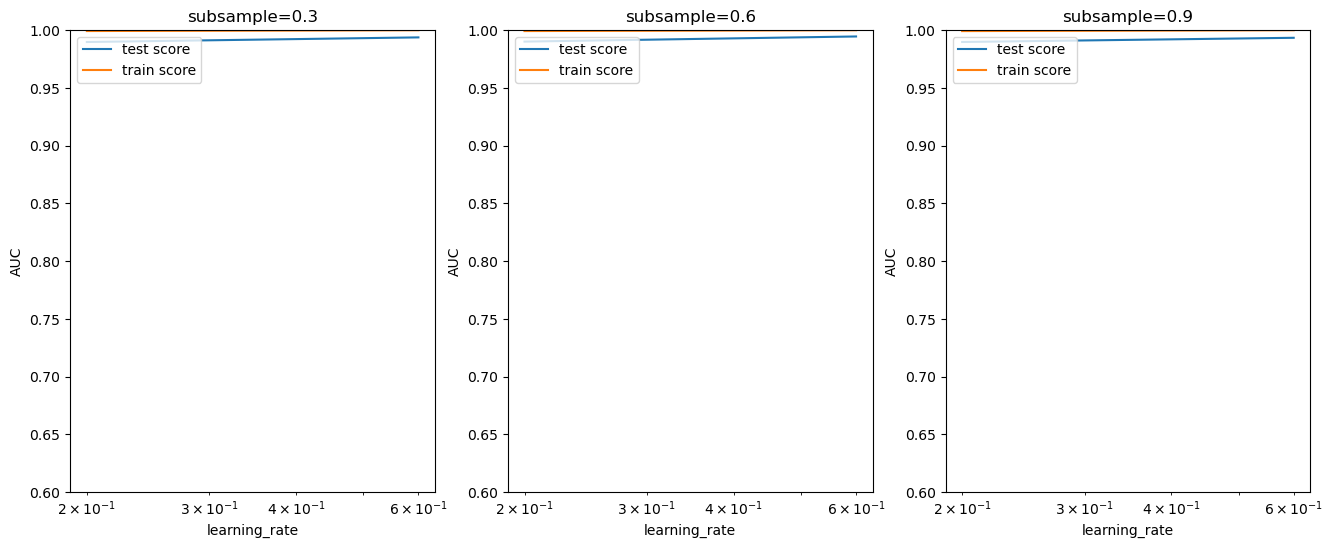

In [239]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [240]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [241]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

In [242]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [243]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[170583      0]
 [     0 170555]]


In [244]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [245]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [246]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170583
           1       1.00      1.00      1.00    170555

    accuracy                           1.00    341138
   macro avg       1.00      1.00      1.00    341138
weighted avg       1.00      1.00      1.00    341138



In [247]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [248]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

1.0

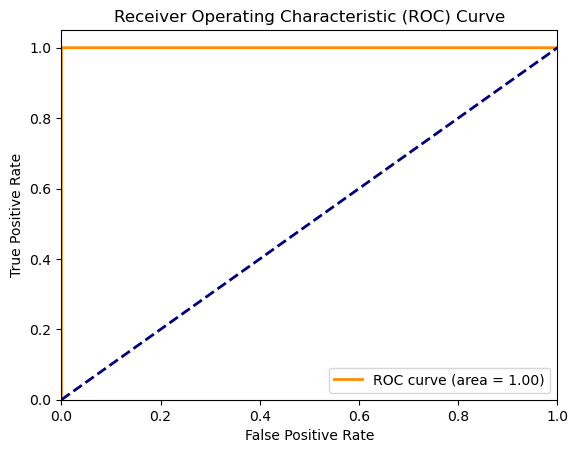

In [251]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [252]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [253]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[113658     74]
 [    26    165]]


In [254]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [255]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9991222141270858
Sensitivity:- 0.8638743455497382
Specificity:- 0.999349347589069


In [256]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113732
           1       0.69      0.86      0.77       191

    accuracy                           1.00    113923
   macro avg       0.85      0.93      0.88    113923
weighted avg       1.00      1.00      1.00    113923



In [257]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [258]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9745336837606475

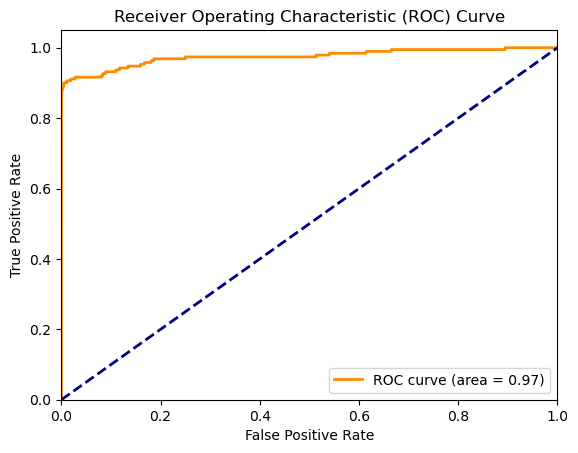

In [271]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [272]:
# Hence, we can conclude that the Logistic regression model with SMOTE

In [273]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9895644373584691
Threshold= 0.41064055393409915
